In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from itertools import combinations

import tensorflow as tf
tf.keras.backend.clear_session()

In [200]:
dfX = pd.read_csv("dataXorig.csv")
dfy = pd.read_csv("datayorig.csv")
dfX = dfX.drop(['Unnamed: 0'], axis = 1)
dfy = dfy.drop(['Unnamed: 0'], axis = 1)

In [201]:
X = dfX.values
y = dfy.values

In [202]:
dfX.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,9.666667,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.000000,3.0
1,1.0,15.541667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0
2,1.0,22.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.972222,2.0
3,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0
4,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.40)

In [204]:
# create scaler from training data
scaler = StandardScaler().fit(X_train)

# apply same scaler to both train and test data
# this steps produces numpy matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
def accuracy(preds, actual):
    return ((preds == actual) * 1).sum() / len(actual)

In [206]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation = 'relu',
                               kernel_initializer='random_normal',
                               bias_initializer='random_normal',
                               kernel_regularizer = tf.keras.regularizers.l1(0.003)))
# model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr = 0.001)

lrreduce = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.7,
    patience=30,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
)
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=400,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

model.compile(optimizer = optimizer,
              loss = loss_fn,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 400, callbacks = [es, lrreduce])

Train on 2444 samples, validate on 611 samples
Epoch 1/400
2444/2444 [==============================] - 1s 281us/sample - loss: 0.5974 - accuracy: 0.9108 - val_loss: 0.5075 - val_accuracy: 0.9885
Epoch 2/400
2444/2444 [==============================] - 0s 49us/sample - loss: 0.4495 - accuracy: 0.9861 - val_loss: 0.4140 - val_accuracy: 0.9902
Epoch 3/400
2444/2444 [==============================] - 0s 47us/sample - loss: 0.3827 - accuracy: 0.9894 - val_loss: 0.3647 - val_accuracy: 0.9918
Epoch 4/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.3437 - accuracy: 0.9898 - val_loss: 0.3316 - val_accuracy: 0.9918
Epoch 5/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.3159 - accuracy: 0.9894 - val_loss: 0.3062 - val_accuracy: 0.9935
Epoch 6/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.2939 - accuracy: 0.9894 - val_loss: 0.2853 - val_accuracy: 0.9935
Epoch 7/400
2444/2444 [==============================] - 0s 41us

Epoch 56/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.0513 - accuracy: 0.9971 - val_loss: 0.0486 - val_accuracy: 0.9967
Epoch 57/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0502 - accuracy: 0.9971 - val_loss: 0.0476 - val_accuracy: 0.9967
Epoch 58/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0492 - accuracy: 0.9971 - val_loss: 0.0467 - val_accuracy: 0.9967
Epoch 59/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0482 - accuracy: 0.9971 - val_loss: 0.0457 - val_accuracy: 0.9967
Epoch 60/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0474 - accuracy: 0.9971 - val_loss: 0.0447 - val_accuracy: 0.9967
Epoch 61/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0465 - accuracy: 0.9971 - val_loss: 0.0439 - val_accuracy: 0.9967
Epoch 62/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.0456 - accuracy: 0.9971

Epoch 111/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0270 - accuracy: 0.9967 - val_loss: 0.0248 - val_accuracy: 0.9967
Epoch 112/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.0267 - accuracy: 0.9971 - val_loss: 0.0247 - val_accuracy: 0.9967
Epoch 113/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.0267 - accuracy: 0.9975 - val_loss: 0.0245 - val_accuracy: 0.9967
Epoch 114/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0265 - accuracy: 0.9975 - val_loss: 0.0244 - val_accuracy: 0.9967
Epoch 115/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0264 - accuracy: 0.9975 - val_loss: 0.0243 - val_accuracy: 0.9967
Epoch 116/400
2444/2444 [==============================] - 0s 47us/sample - loss: 0.0262 - accuracy: 0.9975 - val_loss: 0.0242 - val_accuracy: 0.9967
Epoch 117/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0261 - accuracy:

2444/2444 [==============================] - 0s 42us/sample - loss: 0.0226 - accuracy: 0.9975 - val_loss: 0.0209 - val_accuracy: 0.9967
Epoch 166/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.0226 - accuracy: 0.9980 - val_loss: 0.0211 - val_accuracy: 0.9967
Epoch 167/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.0225 - accuracy: 0.9980 - val_loss: 0.0208 - val_accuracy: 0.9967
Epoch 168/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0224 - accuracy: 0.9980 - val_loss: 0.0209 - val_accuracy: 0.9967
Epoch 169/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.0225 - accuracy: 0.9980 - val_loss: 0.0209 - val_accuracy: 0.9967
Epoch 170/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0224 - accuracy: 0.9975 - val_loss: 0.0209 - val_accuracy: 0.9967
Epoch 171/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.0223 - accuracy: 0.9975 - val_

Epoch 220/400
2444/2444 [==============================] - 0s 38us/sample - loss: 0.0207 - accuracy: 0.9980 - val_loss: 0.0194 - val_accuracy: 0.9967
Epoch 221/400
2444/2444 [==============================] - 0s 40us/sample - loss: 0.0207 - accuracy: 0.9980 - val_loss: 0.0195 - val_accuracy: 0.9967
Epoch 222/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.0206 - accuracy: 0.9975 - val_loss: 0.0194 - val_accuracy: 0.9967
Epoch 223/400
2444/2444 [==============================] - 0s 39us/sample - loss: 0.0207 - accuracy: 0.9975 - val_loss: 0.0194 - val_accuracy: 0.9967
Epoch 224/400
2444/2444 [==============================] - 0s 40us/sample - loss: 0.0206 - accuracy: 0.9980 - val_loss: 0.0194 - val_accuracy: 0.9967
Epoch 225/400
2444/2444 [==============================] - 0s 38us/sample - loss: 0.0206 - accuracy: 0.9975 - val_loss: 0.0194 - val_accuracy: 0.9967
Epoch 226/400
2444/2444 [==============================] - 0s 40us/sample - loss: 0.0205 - accuracy:

2444/2444 [==============================] - 0s 44us/sample - loss: 0.0196 - accuracy: 0.9975 - val_loss: 0.0184 - val_accuracy: 0.9967
Epoch 275/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0195 - accuracy: 0.9971 - val_loss: 0.0185 - val_accuracy: 0.9967
Epoch 276/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0196 - accuracy: 0.9980 - val_loss: 0.0186 - val_accuracy: 0.9967
Epoch 277/400
2444/2444 [==============================] - 0s 38us/sample - loss: 0.0195 - accuracy: 0.9975 - val_loss: 0.0186 - val_accuracy: 0.9967
Epoch 278/400
2444/2444 [==============================] - 0s 42us/sample - loss: 0.0194 - accuracy: 0.9980 - val_loss: 0.0185 - val_accuracy: 0.9967
Epoch 279/400
2444/2444 [==============================] - 0s 39us/sample - loss: 0.0194 - accuracy: 0.9975 - val_loss: 0.0184 - val_accuracy: 0.9967
Epoch 280/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0194 - accuracy: 0.9980 - val_

Epoch 329/400
2444/2444 [==============================] - 0s 46us/sample - loss: 0.0186 - accuracy: 0.9980 - val_loss: 0.0180 - val_accuracy: 0.9951
Epoch 330/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.0186 - accuracy: 0.9980 - val_loss: 0.0179 - val_accuracy: 0.9951
Epoch 331/400
2444/2444 [==============================] - 0s 50us/sample - loss: 0.0186 - accuracy: 0.9980 - val_loss: 0.0179 - val_accuracy: 0.9951
Epoch 332/400
2444/2444 [==============================] - 0s 48us/sample - loss: 0.0185 - accuracy: 0.9980 - val_loss: 0.0179 - val_accuracy: 0.9951
Epoch 333/400
2444/2444 [==============================] - 0s 44us/sample - loss: 0.0186 - accuracy: 0.9980 - val_loss: 0.0181 - val_accuracy: 0.9951
Epoch 334/400
2444/2444 [==============================] - 0s 45us/sample - loss: 0.0185 - accuracy: 0.9980 - val_loss: 0.0179 - val_accuracy: 0.9951
Epoch 335/400
2444/2444 [==============================] - 0s 47us/sample - loss: 0.0185 - accuracy:

2444/2444 [==============================] - 0s 40us/sample - loss: 0.0179 - accuracy: 0.9980 - val_loss: 0.0176 - val_accuracy: 0.9951
Epoch 384/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0178 - accuracy: 0.9980 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 385/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0179 - accuracy: 0.9980 - val_loss: 0.0174 - val_accuracy: 0.9951
Epoch 386/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0178 - accuracy: 0.9980 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 387/400
2444/2444 [==============================] - 0s 43us/sample - loss: 0.0180 - accuracy: 0.9980 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 388/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0179 - accuracy: 0.9975 - val_loss: 0.0175 - val_accuracy: 0.9951
Epoch 389/400
2444/2444 [==============================] - 0s 41us/sample - loss: 0.0178 - accuracy: 0.9975 - val_

In [163]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, activation = 'relu',
                               kernel_initializer='random_normal',
                               bias_initializer='random_normal'))

model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr = 0.001)

model.compile(optimizer = optimizer,
              loss = loss_fn,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100)

Train on 2444 samples, validate on 611 samples
Epoch 1/100
2444/2444 [==============================] - 0s 166us/sample - loss: 0.6345 - accuracy: 0.8969 - val_loss: 0.5660 - val_accuracy: 0.9607
Epoch 2/100
2444/2444 [==============================] - 0s 28us/sample - loss: 0.5160 - accuracy: 0.9746 - val_loss: 0.4567 - val_accuracy: 0.9738
Epoch 3/100
2444/2444 [==============================] - 0s 28us/sample - loss: 0.4252 - accuracy: 0.9845 - val_loss: 0.3847 - val_accuracy: 0.9820
Epoch 4/100
2444/2444 [==============================] - 0s 28us/sample - loss: 0.3664 - accuracy: 0.9857 - val_loss: 0.3388 - val_accuracy: 0.9836
Epoch 5/100
2444/2444 [==============================] - 0s 27us/sample - loss: 0.3273 - accuracy: 0.9869 - val_loss: 0.3069 - val_accuracy: 0.9869
Epoch 6/100
2444/2444 [==============================] - 0s 28us/sample - loss: 0.2987 - accuracy: 0.9890 - val_loss: 0.2824 - val_accuracy: 0.9869
Epoch 7/100
2444/2444 [==============================] - 0s 26us

Epoch 56/100
2444/2444 [==============================] - 0s 29us/sample - loss: 0.0410 - accuracy: 0.9963 - val_loss: 0.0380 - val_accuracy: 0.9967
Epoch 57/100
2444/2444 [==============================] - 0s 29us/sample - loss: 0.0401 - accuracy: 0.9959 - val_loss: 0.0371 - val_accuracy: 0.9967
Epoch 58/100
2444/2444 [==============================] - 0s 27us/sample - loss: 0.0391 - accuracy: 0.9963 - val_loss: 0.0361 - val_accuracy: 0.9967
Epoch 59/100
2444/2444 [==============================] - 0s 29us/sample - loss: 0.0382 - accuracy: 0.9963 - val_loss: 0.0352 - val_accuracy: 0.9967
Epoch 60/100
2444/2444 [==============================] - 0s 27us/sample - loss: 0.0373 - accuracy: 0.9959 - val_loss: 0.0344 - val_accuracy: 0.9967
Epoch 61/100
2444/2444 [==============================] - 0s 28us/sample - loss: 0.0365 - accuracy: 0.9963 - val_loss: 0.0335 - val_accuracy: 0.9967
Epoch 62/100
2444/2444 [==============================] - 0s 29us/sample - loss: 0.0357 - accuracy: 0.9959

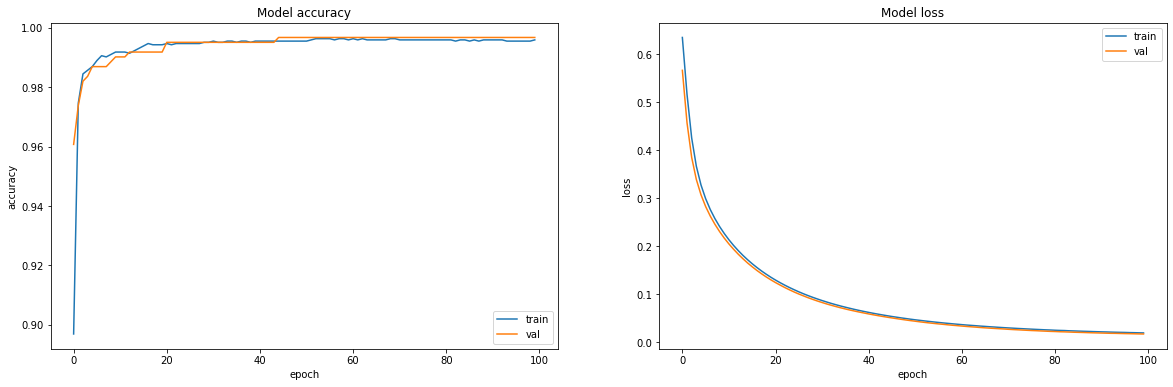

In [164]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [208]:
preds = model.predict_classes(X_test).flatten()

In [209]:
tst = y_test.flatten()

In [210]:
((preds == tst) * 1).sum() / len(tst)

0.9980366492146597

In [184]:
lreg = LogisticRegression().fit(X_train, y_train.flatten())

In [185]:
lreg.score(X_test, y_test.flatten())

0.9954188481675392

In [170]:
model = RandomForestClassifier(n_estimators=10, max_features=3, n_jobs=4)

In [171]:
model.fit(X_train, y_train.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [172]:
model.score(X_test, y_test.flatten())

0.9960732984293194

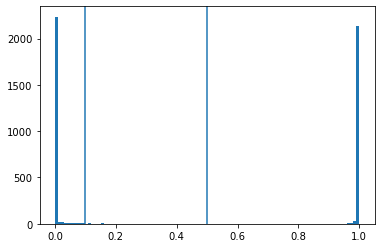

In [197]:
plt.hist(model.predict(X_test), bins = 100)
plt.axvline(0.1)
plt.axvline(0.5)

(array([2360.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

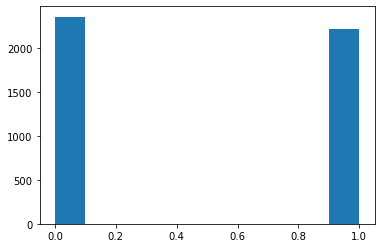

In [198]:
plt.hist(y_test)